# Extraction des données climate des echantillons IRIGIN barthii et glaberrima

In [2]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            # Statistical Data Visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Christine m'a donnée les données de latitude et longitude qu'elle avais récupéré precedement pour l'article de Cubry et al 2020

## Extraction des données clima avec le package R raster

In [3]:
file = "coord-finales-bg.csv"

In [4]:
df = pd.read_csv(file, delimiter='\t', header=0)

In [5]:
df.head()

code_vcf     species    country passeport          latitude  \
0       AA  O. barthii       Mali     518G1  15,7333333333333   
1       AB  O. barthii       Mali     519W1         15,716667   
2       AC  O. barthii       Mali     520W1  14,7666666666667   
3       AQ  O. barthii  Lake Chad     537W1  12,8333333333333   
4       AR  O. barthii  Lake Chad     538W1              12,5   

           longitude  
0  -4,76666666666667  
1          -4,916667  
2  -4,21666666666667  
3   14,9333333333333  
4   14,9166666666667

In [6]:
df['latitude'] = df['latitude'].str.replace(',','.').astype(float)
df['longitude'] = df['longitude'].str.replace(',','.').astype(float)

In [7]:
df.head()

code_vcf     species    country passeport   latitude  longitude
0       AA  O. barthii       Mali     518G1  15.733333  -4.766667
1       AB  O. barthii       Mali     519W1  15.716667  -4.916667
2       AC  O. barthii       Mali     520W1  14.766667  -4.216667
3       AQ  O. barthii  Lake Chad     537W1  12.833333  14.933333
4       AR  O. barthii  Lake Chad     538W1  12.500000  14.916667

In [8]:
output_name=f"{file}".replace('.csv' ,'.clima.csv')
output_name

'coord-finales-bg.clima.csv'

In [9]:
### https://emilypiche.github.io/BIO381/raster.html

In [10]:
# package pour lancer du R
%load_ext rpy2.ipython

In [11]:
%%R -i df -i output_name
require(raster)
set.seed(802)
long = df[,5]
lat = df[,6]

# downloading the data from worlclim
r <- getData("worldclim", var="bio", res=2.5)
# selecting the layers we want and naming them
names(r) = c("b1.Annual_Mean_Temp","b2.Mean_Diurnal_Range", "b3.Isothermality", "b4.Temp_Seasonality", 
             "b5.Max_Temp_of_Warmest_Month", "b6.Min_Temp_of_Coldest_Month", "b7.Temp_Annual_Range",
             "b8.Mean_Temp_of_Wettest_Quarter","b9.Mean_Temp_of_Driest_Quarter","b10.Mean_Temp_of_Warmest_Quarter",
             "b11.Mean_Temp_of_Coldest_Quarter", "b12.Annual_Precipitation", "b13.Precipitation_of_Wettest_Month",
             "b14.Precipitation_of_Driest_Month", "b15.Precipitation_Seasonality", "b16.Precipitation_of_Wettest_Quarter",
             "b17.Precipitation_of_Driest_Quarter", "b18.Precipitation_of_Warmest_Quarter", "b19.Precipitation_of_Coldest_Quarter")
#"code_vcf","species","country","passeport","latitude","longitude"

# putting our coordinates into the format r::raster likes
points <- SpatialPoints(df[,5:6], proj4string = r@crs)
# extracting the values for coordinates (lattitude and longitud)
cc <- extract(r, points)
# creating a dataframe with results
climate <- cbind.data.frame(df, cc)

# What is with those weird temperatures? They are actually in C*10!! 
# Having temperature in this format reduces download time and filesize for the tiles.
# We can easily manipulate those columns into normal Celsius using a function from dplyr.
library(dplyr)
climate <- mutate(climate, MAT=b1.Annual_Mean_Temp/10) %>%
  select(-b1.Annual_Mean_Temp)
write.csv(climate, output_name, row.names = TRUE, sep="\t")
#print(climate)


R[write to console]: Le chargement a nécessité le package : raster

R[write to console]: Le chargement a nécessité le package : sp

R[write to console]: 
Attachement du package : ‘dplyr’


R[write to console]: The following objects are masked from ‘package:raster’:

    intersect, select, union


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
# recovery objet R to python
climate_all = %R climate

In [13]:
climate_all
#172 rows × 25 columns

code_vcf        species       country passeport   latitude  longitude  \
0         AA     O. barthii          Mali     518G1  15.733333  -4.766667   
1         AB     O. barthii          Mali     519W1  15.716667  -4.916667   
2         AC     O. barthii          Mali     520W1  14.766667  -4.216667   
3         AQ     O. barthii     Lake Chad     537W1  12.833333  14.933333   
4         AR     O. barthii     Lake Chad     538W1  12.500000  14.916667   
..       ...            ...           ...       ...        ...        ...   
164       NB  O. glaberrima        Guinea        80   9.998333 -11.318889   
165       ND  O. glaberrima      Zimbabwe        82 -19.013056  29.146389   
166       NF  O. glaberrima  Burkina Faso        87  12.241667  -1.556667   
167       NG  O. glaberrima          Mali        89  17.579722  -3.998611   
168       NI  O. glaberrima       Liberia        97   6.452222  -9.428333   

     b2.Mean_Diurnal_Range  b3.Isothermality  b4.Temp_Seasonality  \
0                     99.0              68.0               1230.0   
1                    100.0              68.0               1235.0   
2                     93.0              65.0               1389.0   
3                    154.0              55.0               3955.0   
4                    154.0              55.0               3913.0   
..                     ...               ...                  ...   
164                    NaN               NaN                  NaN   
165                    NaN               NaN                  NaN   
166                   99.0              73.0               1013.0   
167                  102.0              77.0                636.0   
168                    NaN               NaN                  NaN   

     b5.Max_Temp_of_Warmest_Month  ...  b11.Mean_Temp_of_Coldest_Quarter  \
0                           310.0  ...                             226.0   
1                           301.0  ...                             217.0   
2                           310.0  ...                             223.0   
3                           403.0  ...                             214.0   
4                           403.0  ...                             214.0   
..                            ...  ...                               ...   
164                           NaN  ...                               NaN   
165                           NaN  ...                               NaN   
166                         295.0  ...                             213.0   
167                         309.0  ...                             241.0   
168                           NaN  ...                               NaN   

     b12.Annual_Precipitation  b13.Precipitation_of_Wettest_Month  \
0                      1462.0                               249.0   
1                      1525.0                               259.0   
2                      1416.0                               264.0   
3                       118.0                                62.0   
4                       109.0                                57.0   
..                        ...                                 ...   
164                       NaN                                 NaN   
165                       NaN                                 NaN   
166                    1905.0                               318.0   
167                    1577.0                               216.0   
168                       NaN                                 NaN   

     b14.Precipitation_of_Driest_Month  b15.Precipitation_Seasonality  \
0                                  3.0                           68.0   
1                                  3.0                           67.0   
2                                  0.0                           73.0   
3                                  0.0                          184.0   
4                                  0.0                          172.0   
..                                 ...                            ... 

### Traitement des NaN

Possible de faire de l'imputation mais par facilité j'ai juste viré les NaN

Si imputation voir https://scikit-learn.org/stable/modules/impute.html

In [14]:
climate_all = climate_all.dropna()
#113 rows × 25 columns

In [15]:
climate_all

code_vcf        species       country passeport   latitude  longitude  \
0         AA     O. barthii          Mali     518G1  15.733333  -4.766667   
1         AB     O. barthii          Mali     519W1  15.716667  -4.916667   
2         AC     O. barthii          Mali     520W1  14.766667  -4.216667   
3         AQ     O. barthii     Lake Chad     537W1  12.833333  14.933333   
4         AR     O. barthii     Lake Chad     538W1  12.500000  14.916667   
..       ...            ...           ...       ...        ...        ...   
159       MN  O. glaberrima          Chad       459   9.333333  14.666667   
160       MP  O. glaberrima          Chad       461   9.250000  16.083333   
161       MR  O. glaberrima       Senegal       498  14.850000 -13.000000   
166       NF  O. glaberrima  Burkina Faso        87  12.241667  -1.556667   
167       NG  O. glaberrima          Mali        89  17.579722  -3.998611   

     b2.Mean_Diurnal_Range  b3.Isothermality  b4.Temp_Seasonality  \
0                     99.0              68.0               1230.0   
1                    100.0              68.0               1235.0   
2                     93.0              65.0               1389.0   
3                    154.0              55.0               3955.0   
4                    154.0              55.0               3913.0   
..                     ...               ...                  ...   
159                  148.0              57.0               3202.0   
160                  154.0              55.0               3926.0   
161                  129.0              67.0               1183.0   
166                   99.0              73.0               1013.0   
167                  102.0              77.0                636.0   

     b5.Max_Temp_of_Warmest_Month  ...  b11.Mean_Temp_of_Coldest_Quarter  \
0                           310.0  ...                             226.0   
1                           301.0  ...                             217.0   
2                           310.0  ...                             223.0   
3                           403.0  ...                             214.0   
4                           403.0  ...                             214.0   
..                            ...  ...                               ...   
159                         396.0  ...                             227.0   
160                         402.0  ...                             214.0   
161                         284.0  ...                             176.0   
166                         295.0  ...                             213.0   
167                         309.0  ...                             241.0   

     b12.Annual_Precipitation  b13.Precipitation_of_Wettest_Month  \
0                      1462.0                               249.0   
1                      1525.0                               259.0   
2                      1416.0                               264.0   
3                       118.0                                62.0   
4                       109.0                                57.0   
..                        ...                                 ...   
159                     224.0                                95.0   
160                     116.0                                53.0   
161                    1270.0                               259.0   
166                    1905.0                               318.0   
167                    1577.0                               216.0   

     b14.Precipitation_of_Driest_Month  b15.Precipitation_Seasonality  \
0                                  3.0                           68.0   
1                                  3.0                           67.0   
2                                  0.0                           73.0   
3                                  0.0                          184.0   
4                                  0.0                          172.0   
..                                 ...                            ... 

### Separation de clima et sp

In [16]:
# on vire les colonnes innecessaires
climate = climate_all.drop(
    columns=['code_vcf','species','country','passeport','latitude','longitude'])
#on extrait la variable diagnostique. espece dans notre cas
species = climate_all["species"]
code_vcf = climate_all["code_vcf"]

In [17]:
species.head()

0    O. barthii
1    O. barthii
2    O. barthii
3    O. barthii
4    O. barthii
Name: species, dtype: object

## Correlation de pearson pour les variables clima

In [18]:
climate.head(2)

b2.Mean_Diurnal_Range  b3.Isothermality  b4.Temp_Seasonality  \
0                   99.0              68.0               1230.0   
1                  100.0              68.0               1235.0   

   b5.Max_Temp_of_Warmest_Month  b6.Min_Temp_of_Coldest_Month  \
0                         310.0                         166.0   
1                         301.0                         155.0   

   b7.Temp_Annual_Range  b8.Mean_Temp_of_Wettest_Quarter  \
0                 144.0                            250.0   
1                 146.0                            241.0   

   b9.Mean_Temp_of_Driest_Quarter  b10.Mean_Temp_of_Warmest_Quarter  \
0                           226.0                             258.0   
1                           217.0                             248.0   

   b11.Mean_Temp_of_Coldest_Quarter  b12.Annual_Precipitation  \
0                             226.0                    1462.0   
1                             217.0                    1525.0   

   b13.Precipitation_of_Wettest_Month  b14.Precipitation_of_Driest_Month  \
0                               249.0                                3.0   
1                               259.0                                3.0   

   b15.Precipitation_Seasonality  b16.Precipitation_of_Wettest_Quarter  \
0                           68.0                                 573.0   
1                           67.0                                 603.0   

   b17.Precipitation_of_Driest_Quarter  b18.Precipitation_of_Warmest_Quarter  \
0                                 17.0                                 549.0   
1                                 18.0                                 575.0   

   b19.Precipitation_of_Coldest_Quarter   MAT  
0                                  17.0  24.6  
1                                  18.0  23.7

In [19]:
climate.shape

(110, 19)

In [20]:
species.shape

(110,)

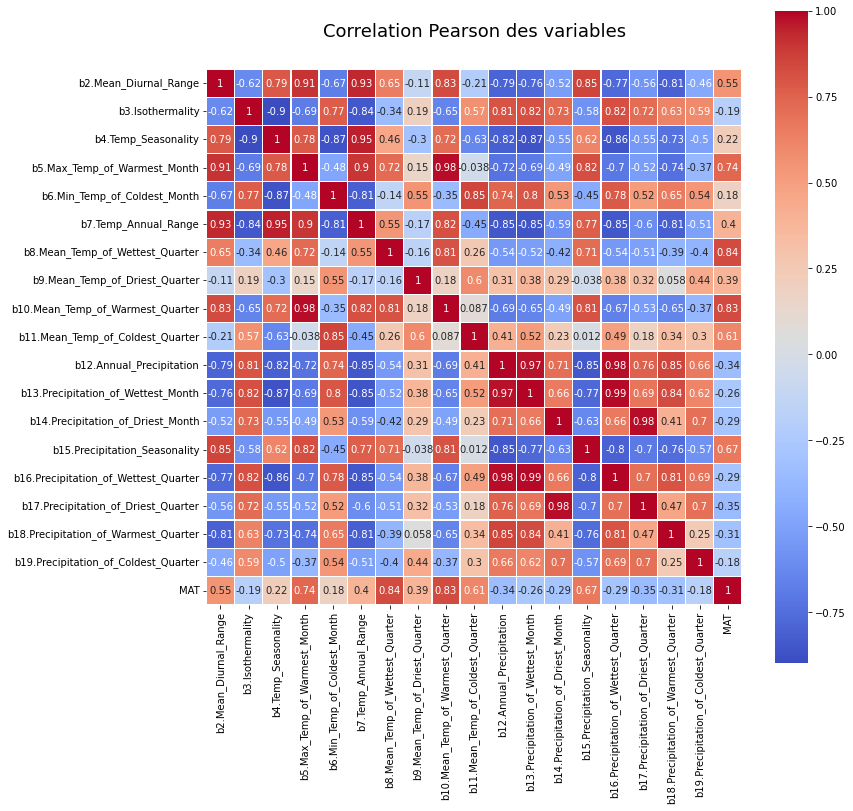

In [21]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)
plt.figure(figsize=(12,12))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(climate.corr(),linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True)

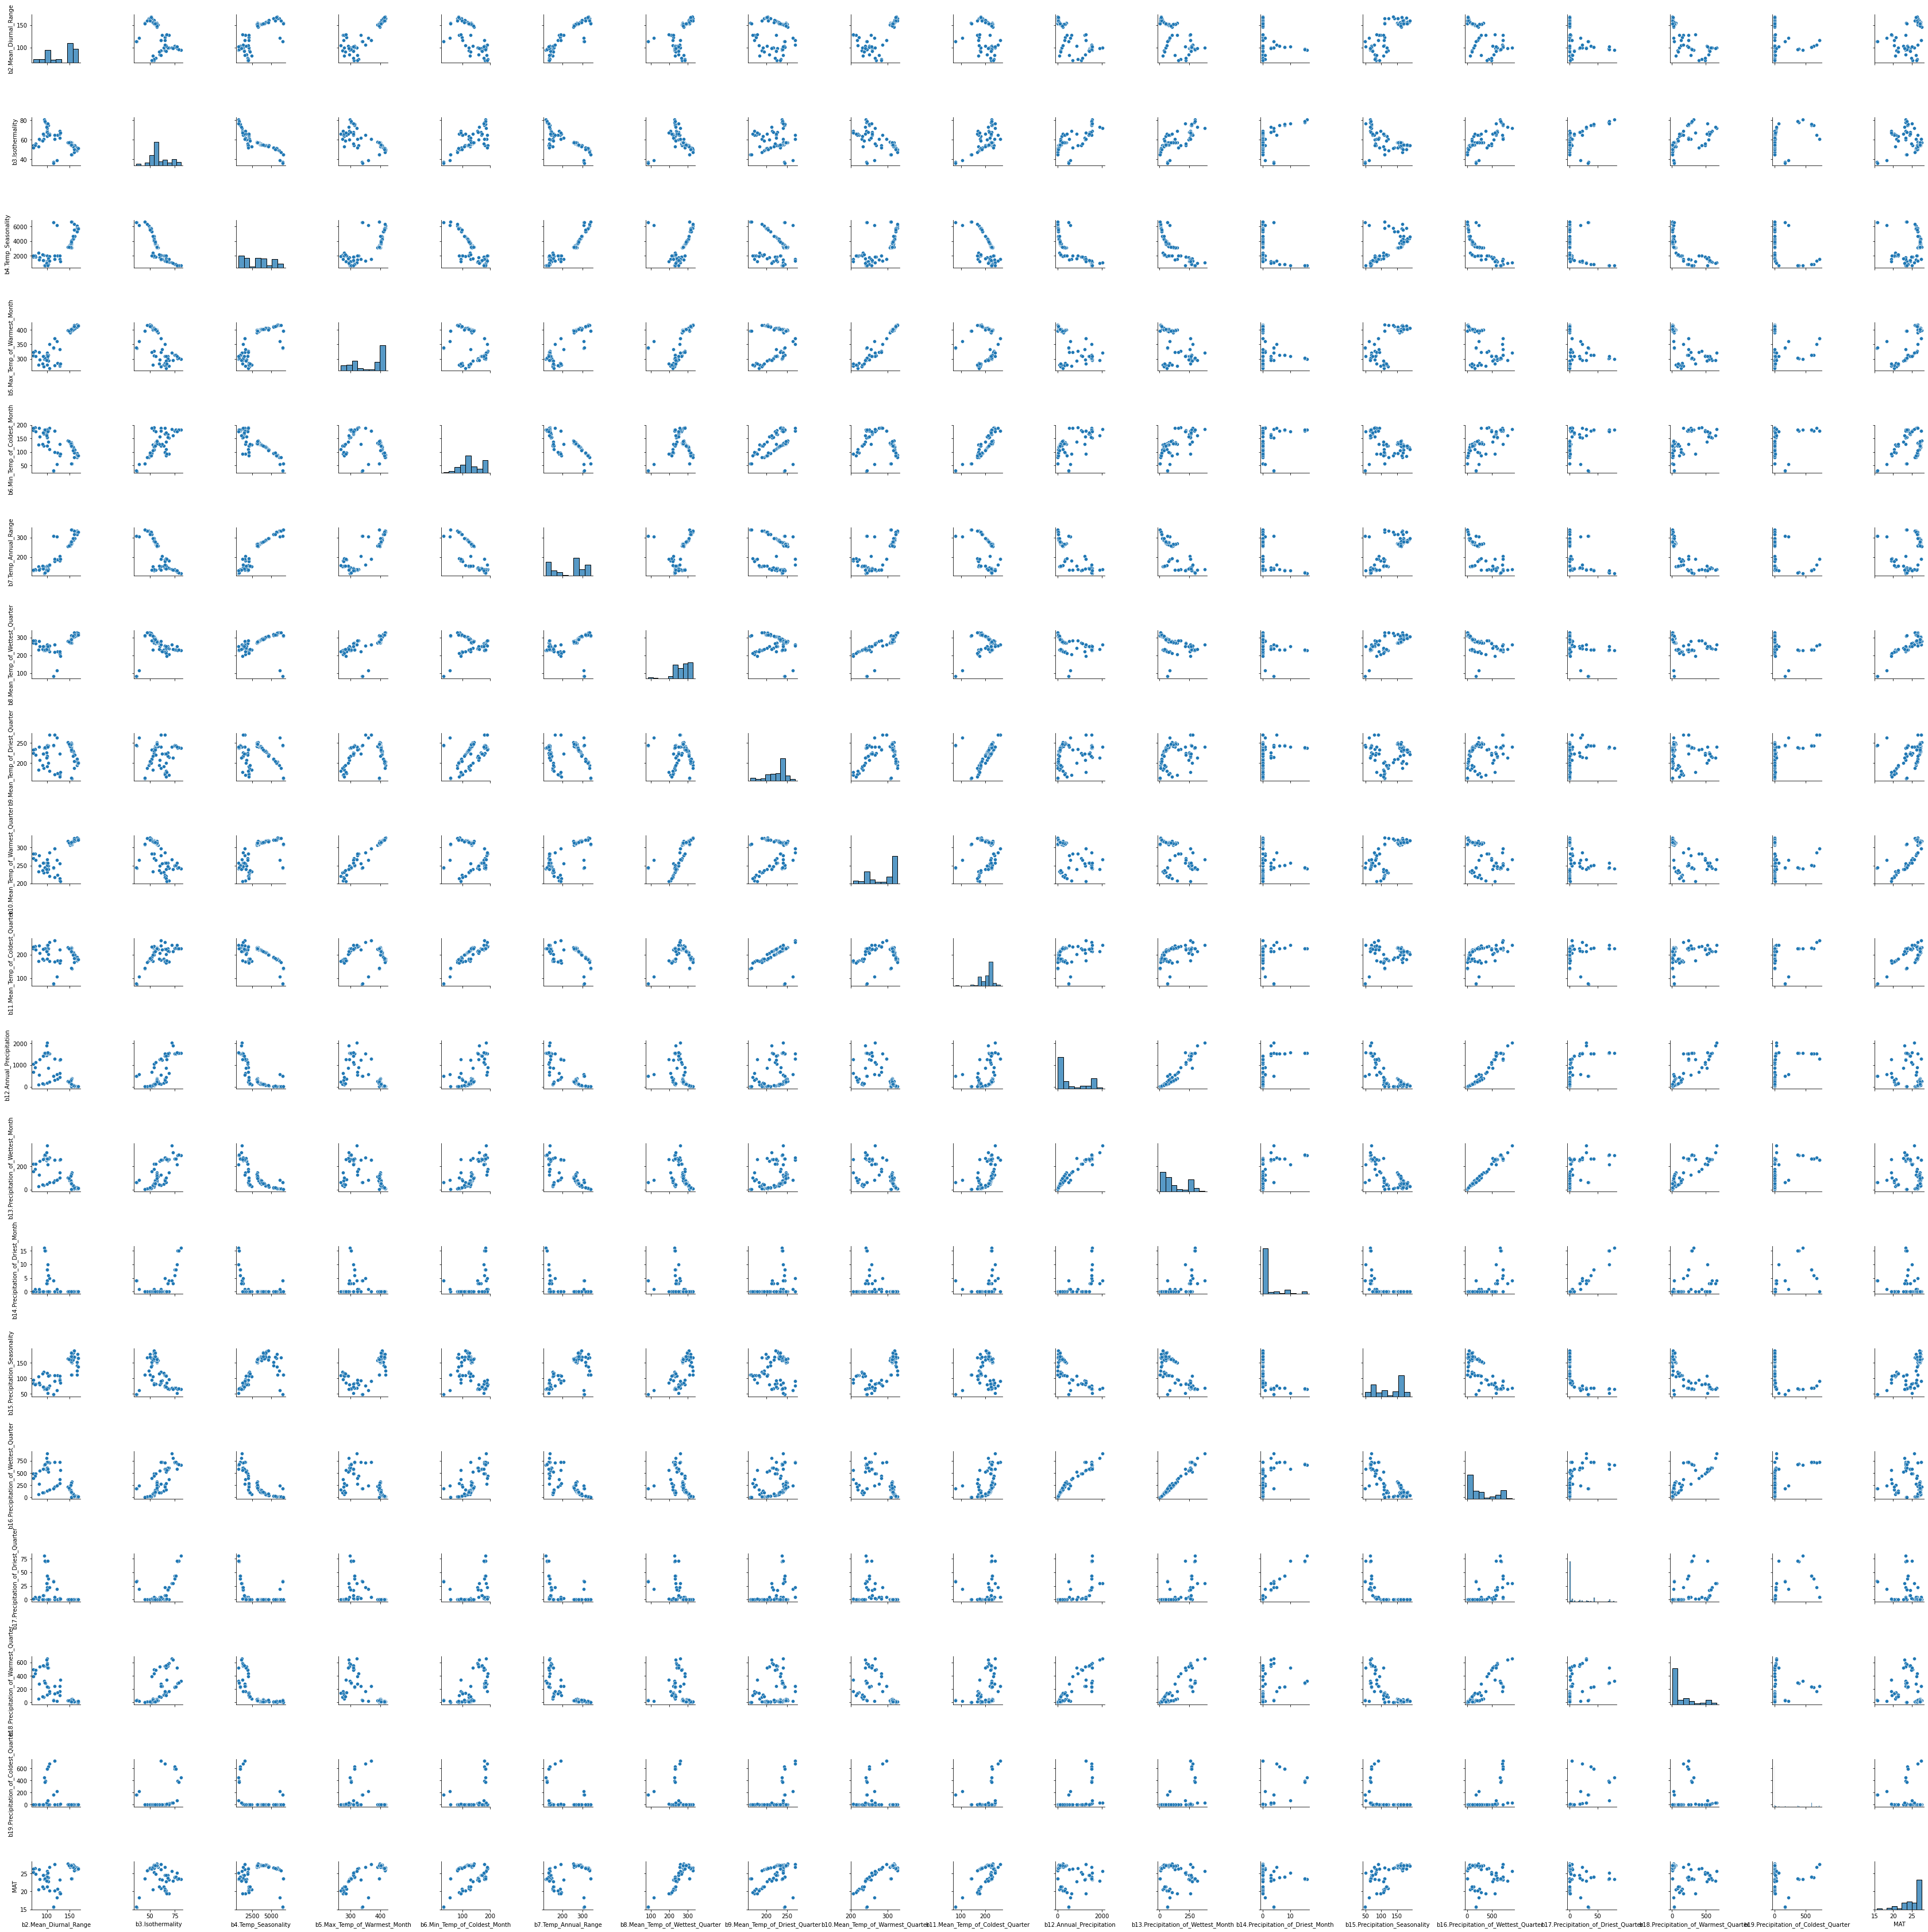

In [22]:
sns.pairplot(data=climate)

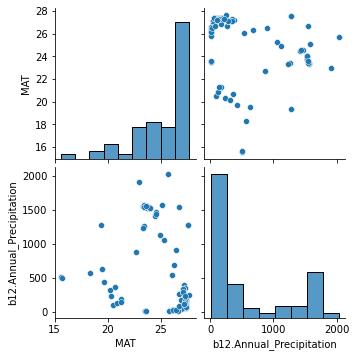

In [23]:
new = climate[['MAT','b12.Annual_Precipitation']]
sns.pairplot(data=new)

### check of "Nan" data

In [24]:
# show features with count of NaN values
s = climate.isnull().sum()
s = s.sort_values(ascending=False)
s = s[s > 0]
s

Series([], dtype: int64)

In [25]:
# check unique names for variables with NaN values (only print 5 firts columns)
for i in s.index:
    print(i, climate[i].unique().tolist()[:5])

In [26]:
for feature in climate.columns:
    climate[feature] = climate[feature].fillna('NaN')

In [27]:
climate.head(2)

b2.Mean_Diurnal_Range  b3.Isothermality  b4.Temp_Seasonality  \
0                   99.0              68.0               1230.0   
1                  100.0              68.0               1235.0   

   b5.Max_Temp_of_Warmest_Month  b6.Min_Temp_of_Coldest_Month  \
0                         310.0                         166.0   
1                         301.0                         155.0   

   b7.Temp_Annual_Range  b8.Mean_Temp_of_Wettest_Quarter  \
0                 144.0                            250.0   
1                 146.0                            241.0   

   b9.Mean_Temp_of_Driest_Quarter  b10.Mean_Temp_of_Warmest_Quarter  \
0                           226.0                             258.0   
1                           217.0                             248.0   

   b11.Mean_Temp_of_Coldest_Quarter  b12.Annual_Precipitation  \
0                             226.0                    1462.0   
1                             217.0                    1525.0   

   b13.Precipitation_of_Wettest_Month  b14.Precipitation_of_Driest_Month  \
0                               249.0                                3.0   
1                               259.0                                3.0   

   b15.Precipitation_Seasonality  b16.Precipitation_of_Wettest_Quarter  \
0                           68.0                                 573.0   
1                           67.0                                 603.0   

   b17.Precipitation_of_Driest_Quarter  b18.Precipitation_of_Warmest_Quarter  \
0                                 17.0                                 549.0   
1                                 18.0                                 575.0   

   b19.Precipitation_of_Coldest_Quarter   MAT  
0                                  17.0  24.6  
1                                  18.0  23.7

In [28]:
# check again NaN values
s = climate.isnull().sum()
s = s.sort_values(ascending=False)
s = s[s > 0]
s

Series([], dtype: int64)

## Distribution des variables clima

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


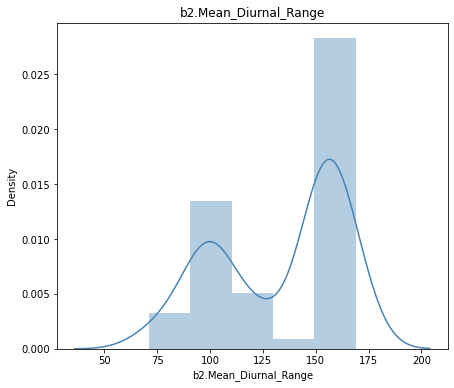

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


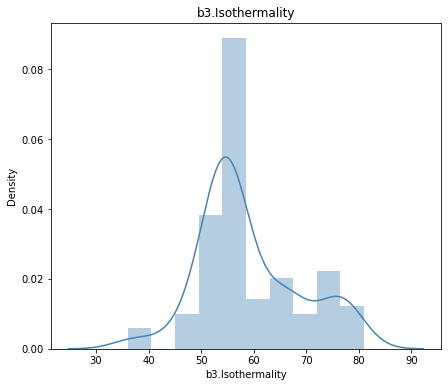

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


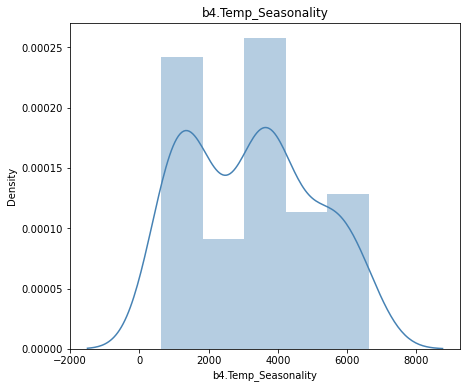

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


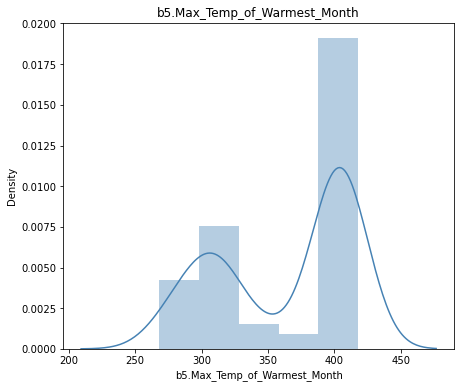

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


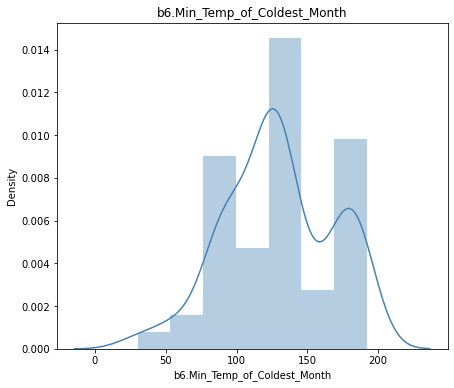

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


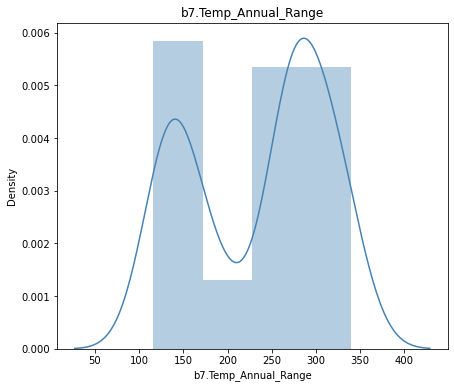

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


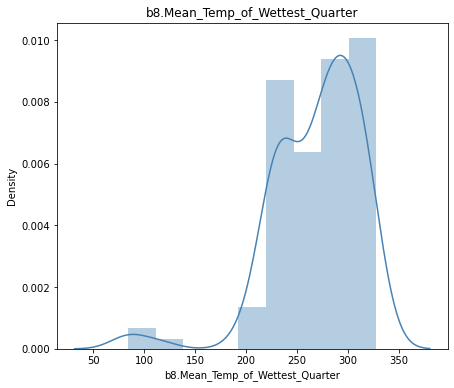

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


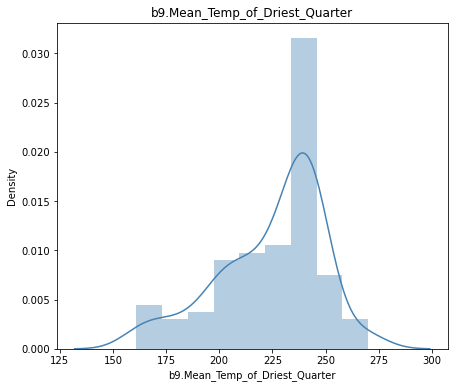

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


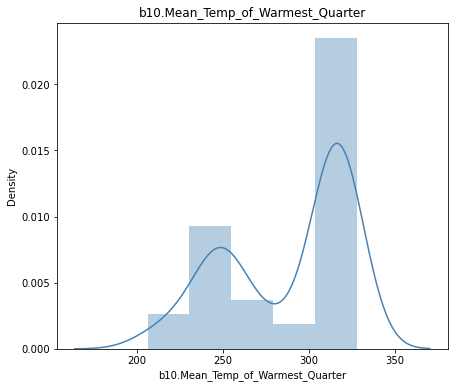

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


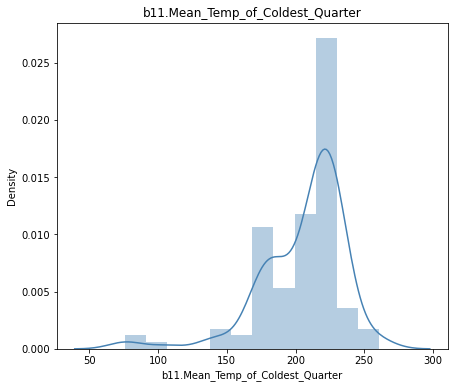

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


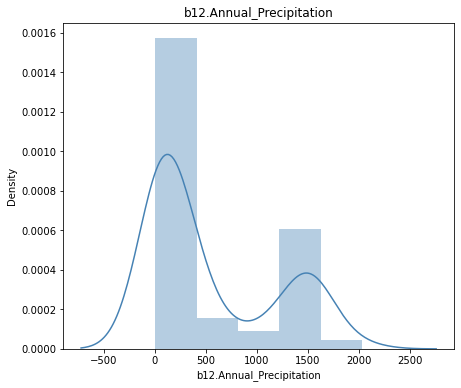

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


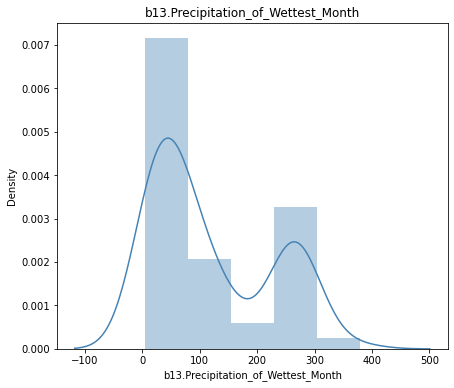

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


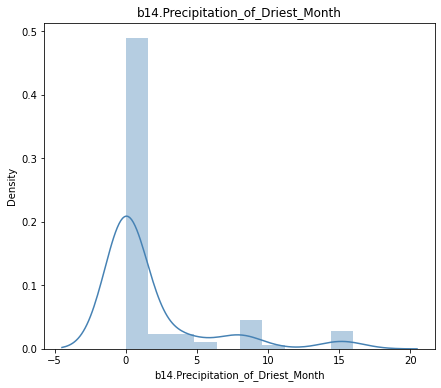

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


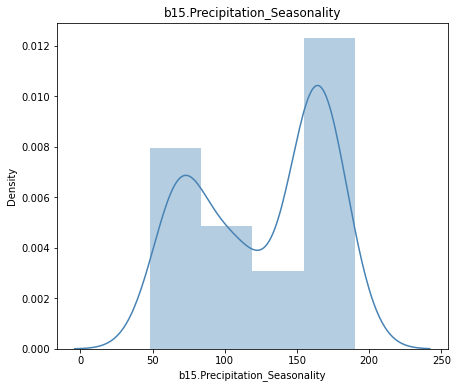

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


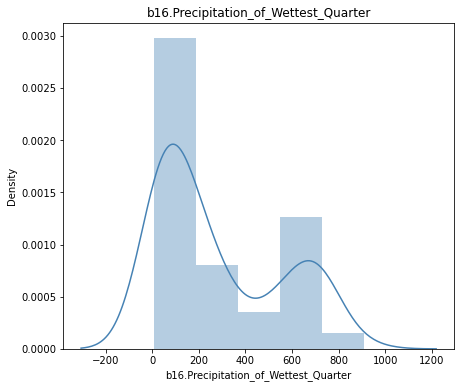

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


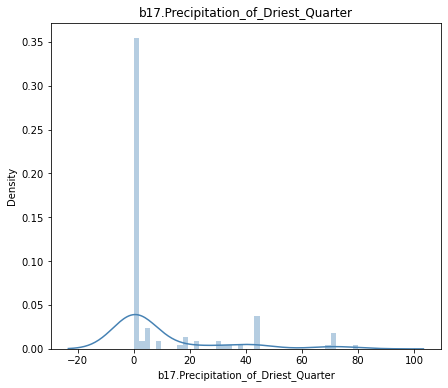

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


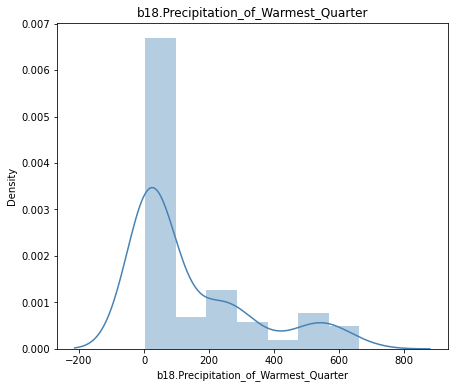

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


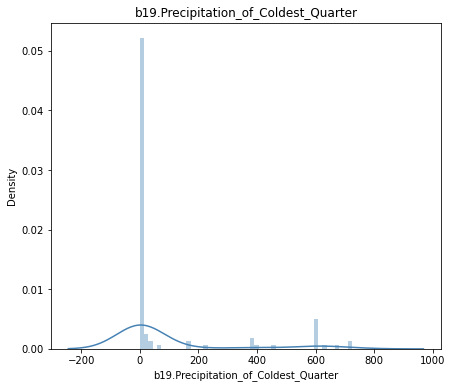

/home/orjuela/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


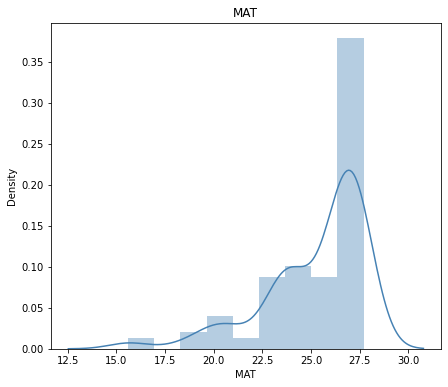

In [29]:
for i in climate.columns:
    plt.figure(figsize=(7,6))
    plt.title(i)
    sns.distplot(climate[i], color="steelblue")
    plt.show()
    

In [30]:
climate

b2.Mean_Diurnal_Range  b3.Isothermality  b4.Temp_Seasonality  \
0                     99.0              68.0               1230.0   
1                    100.0              68.0               1235.0   
2                     93.0              65.0               1389.0   
3                    154.0              55.0               3955.0   
4                    154.0              55.0               3913.0   
..                     ...               ...                  ...   
159                  148.0              57.0               3202.0   
160                  154.0              55.0               3926.0   
161                  129.0              67.0               1183.0   
166                   99.0              73.0               1013.0   
167                  102.0              77.0                636.0   

     b5.Max_Temp_of_Warmest_Month  b6.Min_Temp_of_Coldest_Month  \
0                           310.0                         166.0   
1                           301.0                         155.0   
2                           310.0                         168.0   
3                           403.0                         123.0   
4                           403.0                         124.0   
..                            ...                           ...   
159                         396.0                         139.0   
160                         402.0                         122.0   
161                         284.0                          93.0   
166                         295.0                         161.0   
167                         309.0                         177.0   

     b7.Temp_Annual_Range  b8.Mean_Temp_of_Wettest_Quarter  \
0                   144.0                            250.0   
1                   146.0                            241.0   
2                   142.0                            250.0   
3                   280.0                            296.0   
4                   279.0                            294.0   
..                    ...                              ...   
159                 257.0                            275.0   
160                 280.0                            290.0   
161                 191.0                            197.0   
166                 134.0                            233.0   
167                 132.0                            251.0   

     b9.Mean_Temp_of_Driest_Quarter  b10.Mean_Temp_of_Warmest_Quarter  \
0                             226.0                             258.0   
1                             217.0                             248.0   
2                             223.0                             258.0   
3                             234.0                             315.0   
4                             234.0                             314.0   
..                              ...                               ...   
159                           247.0                             314.0   
160                           233.0                             315.0   
161                           177.0                             206.0   
166                           213.0                             239.0   
167                           241.0                             257.0   

     b11.Mean_Temp_of_Coldest_Quarter  b12.Annual_Precipitation  \
0                               226.0                    1462.0   
1                               217.0                    1525.0   
2                               223.0                    1416.0   
3                               214.0                     118.0   
4                               214.0                     109.0   
..                                ...                       ...   
159                             227.0                     224.0   
160                             214.0                     116.0   
161                             176.0                    1270.0   
166                             213.0                    1905.0   
167         

## PCA avec toutes les variables clima

In [31]:
# plus haut j'ai separé les variables clima des speces (glab et barthii)

In [32]:
X = climate
y = species

In [33]:
X.head(2)

b2.Mean_Diurnal_Range  b3.Isothermality  b4.Temp_Seasonality  \
0                   99.0              68.0               1230.0   
1                  100.0              68.0               1235.0   

   b5.Max_Temp_of_Warmest_Month  b6.Min_Temp_of_Coldest_Month  \
0                         310.0                         166.0   
1                         301.0                         155.0   

   b7.Temp_Annual_Range  b8.Mean_Temp_of_Wettest_Quarter  \
0                 144.0                            250.0   
1                 146.0                            241.0   

   b9.Mean_Temp_of_Driest_Quarter  b10.Mean_Temp_of_Warmest_Quarter  \
0                           226.0                             258.0   
1                           217.0                             248.0   

   b11.Mean_Temp_of_Coldest_Quarter  b12.Annual_Precipitation  \
0                             226.0                    1462.0   
1                             217.0                    1525.0   

   b13.Precipitation_of_Wettest_Month  b14.Precipitation_of_Driest_Month  \
0                               249.0                                3.0   
1                               259.0                                3.0   

   b15.Precipitation_Seasonality  b16.Precipitation_of_Wettest_Quarter  \
0                           68.0                                 573.0   
1                           67.0                                 603.0   

   b17.Precipitation_of_Driest_Quarter  b18.Precipitation_of_Warmest_Quarter  \
0                                 17.0                                 549.0   
1                                 18.0                                 575.0   

   b19.Precipitation_of_Coldest_Quarter   MAT  
0                                  17.0  24.6  
1                                  18.0  23.7

In [34]:
y.head(2)

0    O. barthii
1    O. barthii
Name: species, dtype: object

In [35]:
# Z-score the feature # optional
modelStd = StandardScaler()
modelStd.fit(X)
x = modelStd.transform(X)

In [36]:
# check taille de la matrice transformé pour pca
x.shape

(110, 19)

In [37]:
# x sont les zscores transformés
x

array([[-1.15368535,  0.94439025, -1.10869418, ...,  2.2059862 ,
        -0.37325165, -0.23942165],
       [-1.12003237,  0.94439025, -1.10592891, ...,  2.34668601,
        -0.36842247, -0.58443974],
       [-1.35560323,  0.63148986, -1.02075884, ...,  2.17892854,
        -0.41671426, -0.27775699],
       ...,
       [-0.14409594,  0.84009012, -1.13468764, ...,  1.08579919,
        -0.40222672, -2.23285951],
       [-1.15368535,  1.46589089, -1.22870656, ...,  2.70925862,
        -0.31047232, -0.85278714],
       [-1.05272641,  1.8830914 , -1.43720733, ...,  2.05987485,
        -0.11247597, -0.04774493]])

### Fit PCA avec toutes les dimensions 

In [38]:
# on fit a partir de la matrice x des Zcores 
pca = PCA()
model = pca.fit(x)

In [39]:
pca.explained_variance_ratio_.shape[0]

19

In [40]:
pca.explained_variance_ratio_.cumsum()*100

array([ 61.87296504,  79.94869219,  88.16107807,  92.47564587,
        95.6349085 ,  97.63843376,  99.32680413,  99.600575  ,
        99.81835888,  99.87990182,  99.93228812,  99.96004237,
        99.97404748,  99.9858426 ,  99.99357045,  99.99648378,
        99.99880062, 100.        , 100.        ])

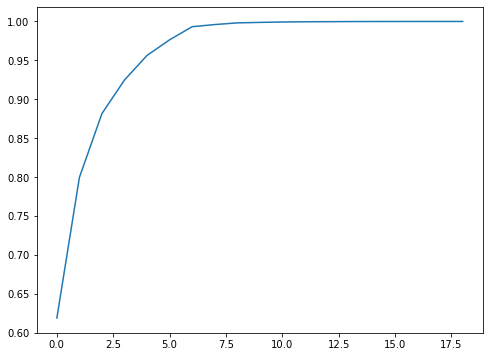

In [41]:
plt.figure(figsize=(8,6))
plt.plot(pca.explained_variance_ratio_.cumsum())

In [42]:
# 5 axes expliquen 95 de la variance
sum(pca.explained_variance_ratio_.cumsum() < .95) + 1

5

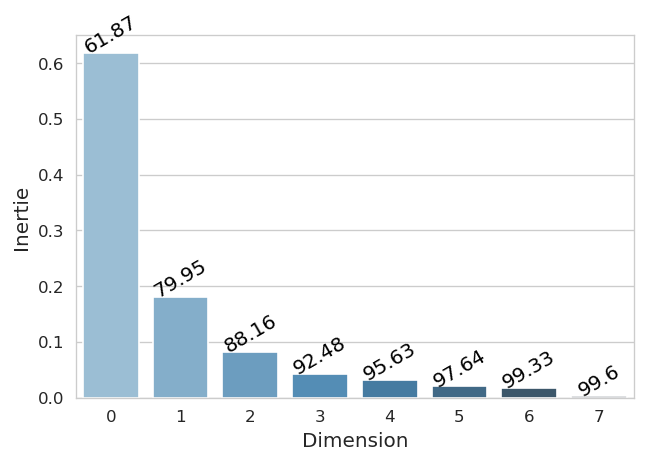

In [43]:
# on plotte l'inertia dans c/axe

font1 = fm.FontProperties(size=12)

inertie = pd.DataFrame(pca.explained_variance_ratio_,columns=['Inertie']) 
inertie['label'] = np.round(pca.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(0,pca.explained_variance_ratio_.shape[0])

ndim = 8
plt.figure(figsize=(6,4),dpi=120)
sns.set_style("whitegrid")
g = sns.barplot(x="Dimension",y='Inertie', 
                data=inertie.iloc[:ndim,:], 
                palette="Blues_d")

for index, row in inertie.iloc[:ndim,:].iterrows():
    g.text(row.name,row.Inertie, 
           row.label, 
           color='black', ha="center", 
           rotation=30, 
           fontproperties=font1)
    
plt.xlabel('Dimension', fontproperties=font1)
plt.ylabel('Inertie', fontproperties=font1)
plt.show()
plt.style.use('seaborn-darkgrid')

In [44]:
n_components = sum(pca.explained_variance_ratio_.cumsum() < .95 ) + 1 
n_components

5

### PCA avec n_components

avec le nb des dimensions qui expliquent > 95 de la variance

In [45]:
modelPCA = PCA(n_components=n_components)
modelPCA.fit(x)

PCA(n_components=5)

In [46]:
y

0         O. barthii
1         O. barthii
2         O. barthii
3         O. barthii
4         O. barthii
           ...      
159    O. glaberrima
160    O. glaberrima
161    O. glaberrima
166    O. glaberrima
167    O. glaberrima
Name: species, Length: 110, dtype: object

In [47]:
# transform of x (matrice de zscores)
dfPCA = pd.DataFrame(data=modelPCA.transform(x),
                  columns=[f'Dim{str(x+1)}' for x in range(0,n_components)])
# on lui colle la colonne sp
dfPCA['species'] = climate_all['species'].values
dfPCA['code_vcf'] = climate_all['code_vcf'].values
dfPCA

Dim1      Dim2      Dim3      Dim4      Dim5        species code_vcf
0    4.031195 -0.088648 -1.570894  0.101177  1.070254     O. barthii       AA
1    4.221275  0.588817 -1.583834 -0.024921  1.156196     O. barthii       AB
2    3.695843  0.086782 -2.150803  0.604053  1.140034     O. barthii       AC
3   -2.409618 -1.145944 -0.087064  0.125204 -0.339303     O. barthii       AQ
4   -2.382106 -1.080300 -0.010332  0.154423 -0.401289     O. barthii       AR
..        ...       ...       ...       ...       ...            ...      ...
105 -1.467733 -1.527080 -0.130744  0.712269 -0.556617  O. glaberrima       MN
106 -2.374944 -1.000977  0.006877  0.172448 -0.393815  O. glaberrima       MP
107  2.982515  3.709241 -1.527550 -0.136411  0.025491  O. glaberrima       MR
108  5.396140  0.693827 -1.512382 -0.261747  1.536999  O. glaberrima       NF
109  5.620136 -0.950623  0.461885 -1.351045  0.744609  O. glaberrima       NG

[110 rows x 7 columns]

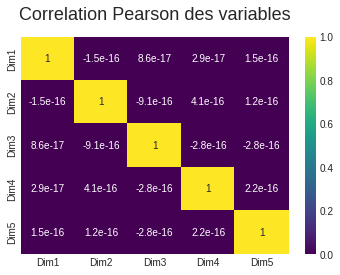

In [48]:
plt.title('Correlation Pearson des variables', y=1.05, size=18)
ax = sns.heatmap(dfPCA.corr(), annot=True, cmap='viridis')
plt.show()

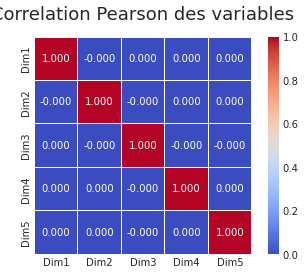

In [49]:
# plot de la correlation de pearson des variables de l'acp
#plt.figure(figsize=(8,8))
#sns.set(font_scale=2.5)
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(dfPCA.corr(),linewidths=0.3,vmax=1.0, fmt='.3f',
            square=True, cmap='coolwarm', linecolor='white', annot=True)
sns.set(font_scale=1)

<Figure size 432x288 with 0 Axes>

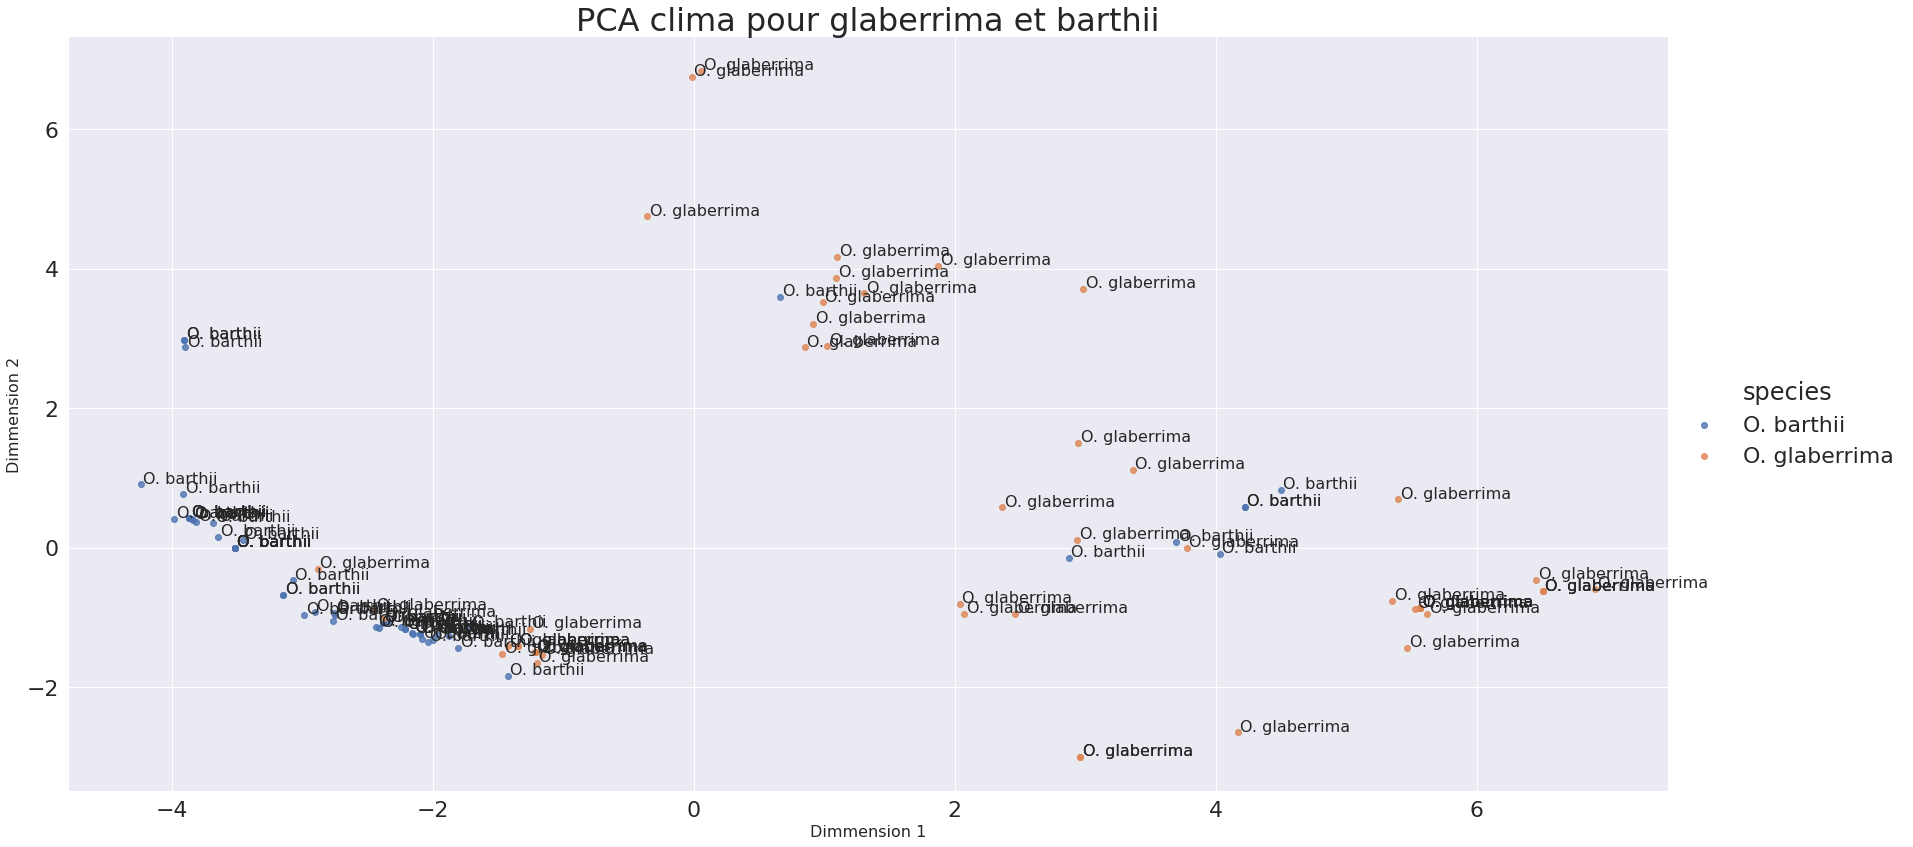

In [50]:
# PCA representation
sns.set(font_scale=2)
font1 = fm.FontProperties(size=16)
font2 = fm.FontProperties(size=32)

plt.figure()

ax = sns.lmplot(x='Dim1',y='Dim2', hue='species', data=dfPCA, 
                fit_reg=False, height = 12, aspect =2 ) 

plt.title('PCA clima pour glaberrima et barthii', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), 
                fontproperties=font1)

label_point(dfPCA.Dim1, dfPCA.Dim2, dfPCA.species, plt.gca())

### Pearson pour les variables dans les nouvelles dimensions de l'ACP

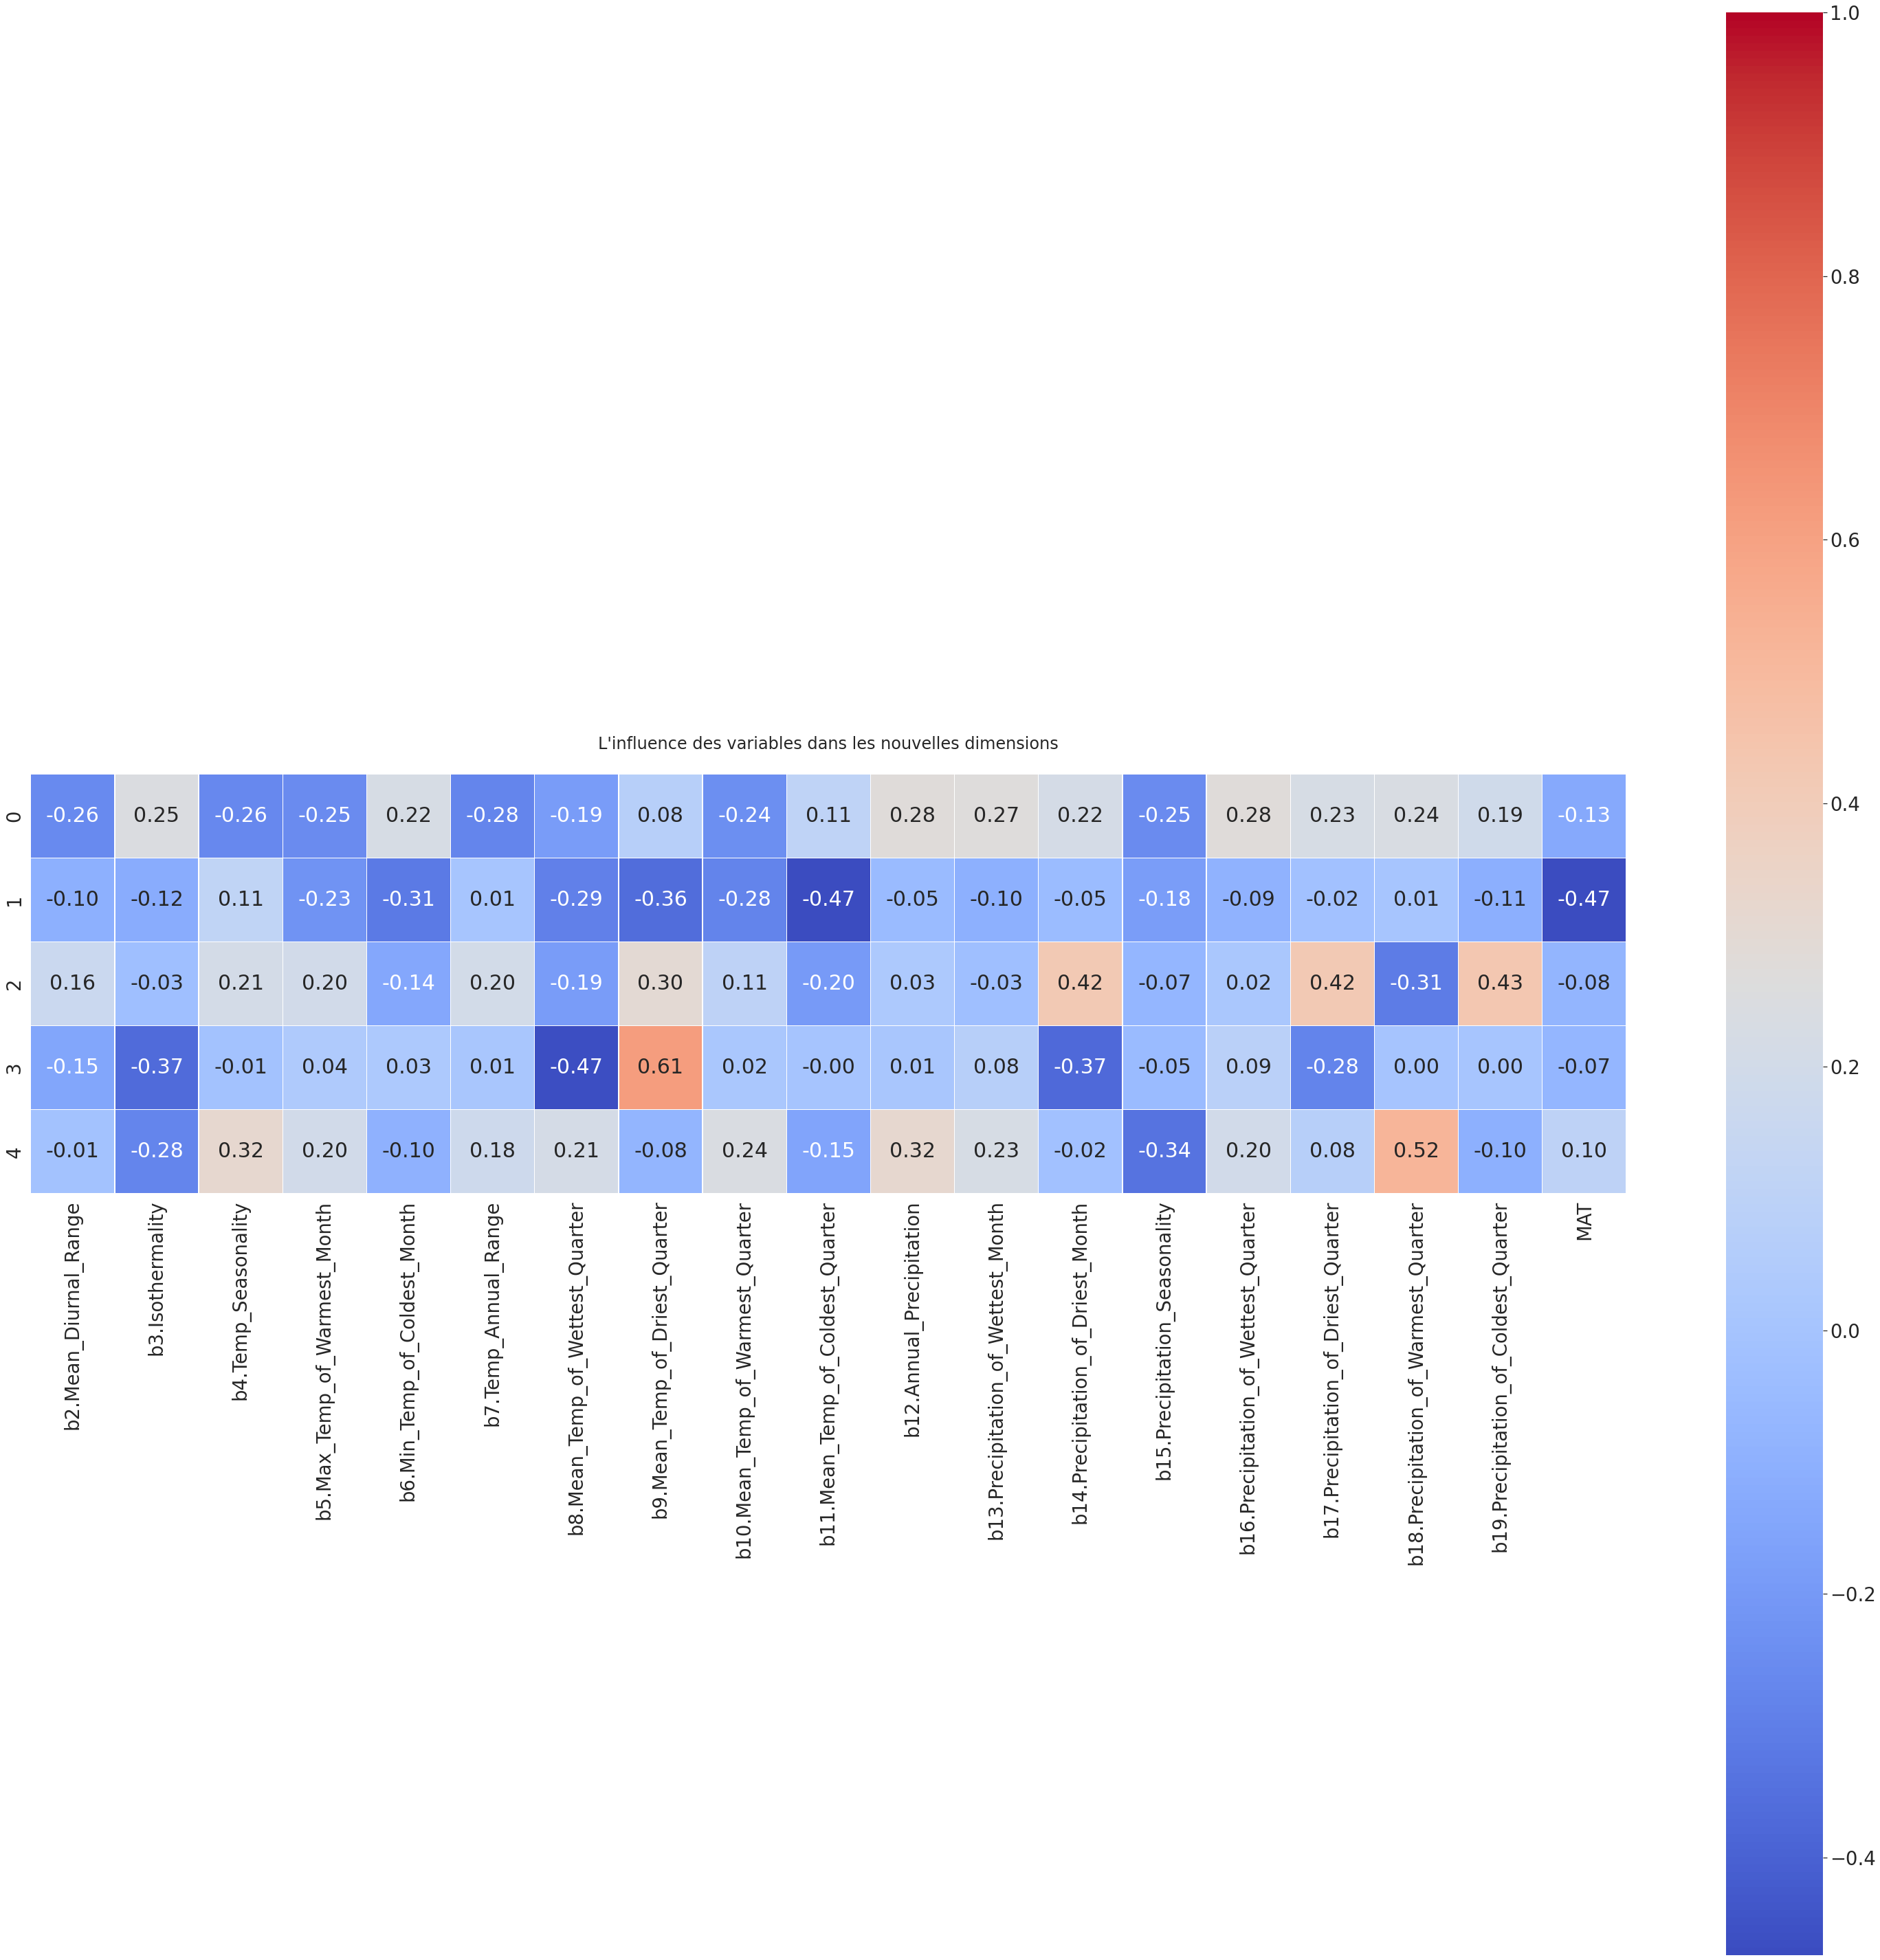

In [51]:
plt.figure(figsize=(52,52))
sns.set(font_scale=2.5)
plt.title("L'influence des variables dans les nouvelles dimensions", y=1.05, size=24)
sns.heatmap(pd.DataFrame(modelPCA.components_, columns=X.columns),
            fmt= '.2f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

---------------
### biplot 

on va essayer de voir quelle sont les variables avec plus de poid dans c/dimension

In [52]:
### TEST ACP 
#https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

In [53]:
# remplacer les 'sp' par des int
y.mask(y == 'O. glaberrima', 0, inplace=True)
y.mask(y == 'O. barthii', 1, inplace=True)

<ipython-input-53-981da70d0ace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.mask(y == 'O. glaberrima', 0, inplace=True)
<ipython-input-53-981da70d0ace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.mask(y == 'O. barthii', 1, inplace=True)


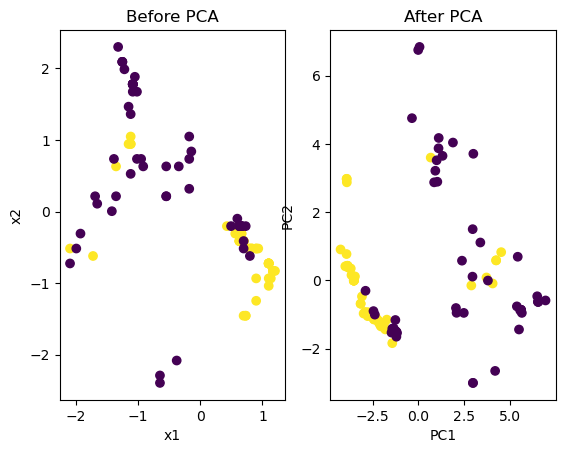

In [54]:
# Let’s plot the data before and after the PCA transform and also color code each point (sample) using the corresponding class 
plt.rcParams.update(plt.rcParamsDefault) # defaults params
X = climate
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# The PCA model
pca = PCA(n_components=5) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [55]:
str(pca)

'PCA(n_components=5)'

In [56]:
print(pca.explained_variance_ratio_)

[0.61872965 0.18075727 0.08212386 0.04314568 0.03159263]


In [57]:
#The maximum variance proof can be also seen by estimating the covariance matrix of the reduced space
np.cov(X_new.T)

array([[ 1.18637153e+01, -3.49261686e-16,  2.57990370e-16,
        -8.95319837e-16, -6.70183512e-17],
       [-3.49261686e-16,  3.46589631e+00, -1.36389165e-16,
         5.53374445e-16,  4.18303017e-16],
       [ 2.57990370e-16, -1.36389165e-16,  1.57466849e+00,
        -4.06009871e-16,  2.65084834e-17],
       [-8.95319837e-16,  5.53374445e-16, -4.06009871e-16,
         8.27288689e-01, -9.10531246e-17],
       [-6.70183512e-17,  4.18303017e-16,  2.65084834e-17,
        -9.10531246e-17,  6.05766871e-01]])

In [58]:
pca.explained_variance_

array([11.86371532,  3.46589631,  1.57466849,  0.82728869,  0.60576687])

In [59]:
pca.components_
# on dirait que pour l'axe1 toutes les variables contribuent un peu (7,8,10,18 et 19 un peu moins), 
# pour l'axe2 5,7,8,10

array([[-2.60120524e-01,  2.50932746e-01, -2.63276776e-01,
        -2.50240538e-01,  2.23595442e-01, -2.76843057e-01,
        -1.87831349e-01,  7.67845381e-02, -2.38631084e-01,
         1.11633351e-01,  2.77904183e-01,  2.73872982e-01,
         2.15735700e-01, -2.52752660e-01,  2.76243993e-01,
         2.25318385e-01,  2.36928998e-01,  1.91940443e-01,
        -1.32273413e-01],
       [-1.03654047e-01, -1.22337100e-01,  1.14065268e-01,
        -2.25432765e-01, -3.14898780e-01,  8.23331780e-03,
        -2.91820956e-01, -3.60252231e-01, -2.80801935e-01,
        -4.74059073e-01, -5.06031138e-02, -1.02336821e-01,
        -4.66440888e-02, -1.81439082e-01, -8.87426417e-02,
        -1.70335548e-02,  7.68519331e-03, -1.09527481e-01,
        -4.73663081e-01],
       [ 1.63357921e-01, -2.81944611e-02,  2.10737206e-01,
         1.95492113e-01, -1.44930021e-01,  2.01431886e-01,
        -1.89054362e-01,  2.98889152e-01,  1.07335719e-01,
        -1.97392571e-01,  3.17592754e-02, -2.52803172e-02,
    

In [60]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
#loadings_df['variable'] = df.columns.values
#loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5
0  -0.260121 -0.103654  0.163358 -0.148979 -0.007730
1   0.250933 -0.122337 -0.028194 -0.370321 -0.277768
2  -0.263277  0.114065  0.210737 -0.008748  0.320383
3  -0.250241 -0.225433  0.195492  0.042781  0.198698
4   0.223595 -0.314899 -0.144930  0.031844 -0.096602
5  -0.276843  0.008233  0.201432  0.012366  0.179435
6  -0.187831 -0.291821 -0.189054 -0.468124  0.212410
7   0.076785 -0.360252  0.298889  0.614448 -0.077792
8  -0.238631 -0.280802  0.107336  0.020141  0.243516
9   0.111633 -0.474059 -0.197393 -0.000437 -0.154550
10  0.277904 -0.050603  0.031759  0.010059  0.319011
11  0.273873 -0.102337 -0.025280  0.077794  0.225243
12  0.215736 -0.046644  0.419224 -0.374947 -0.015252
13 -0.252753 -0.181439 -0.074238 -0.053453 -0.337483
14  0.276244 -0.088743  0.015710  0.086268  0.198040
15  0.225318 -0.017034  0.423559 -0.279459  0.077048
16  0.236929  0.007685 -0.310071  0.002488  0.521106
17  0.191940 -0.109527  0.432832  0.004071 -0.104339
18 -0.132273 -0.473663 -0.081899 -0.073096  0.102716

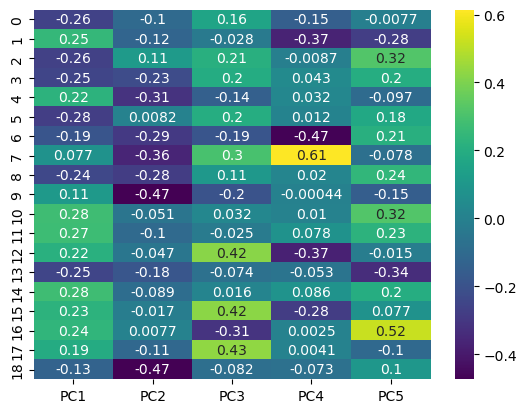

In [61]:
# get correlation matrix plot for loadings
plt.rcParams.update(plt.rcParamsDefault) # defaults params
ax = sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


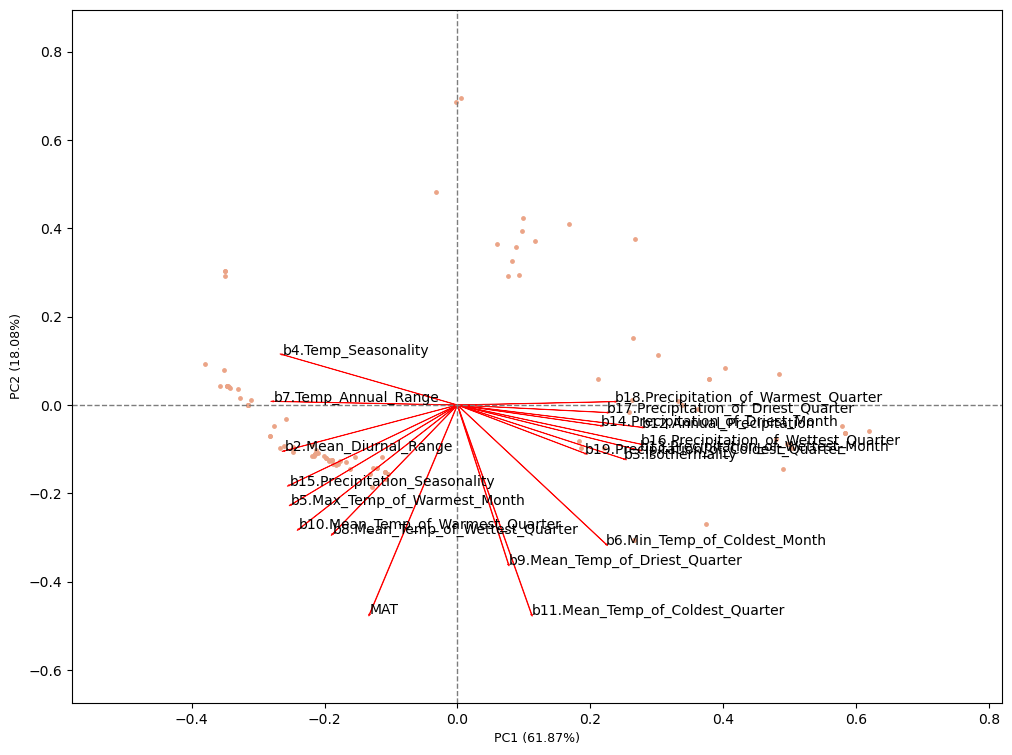

In [62]:
# get PC scores
df = climate
df_st =  StandardScaler().fit_transform(df)  
pd.DataFrame(df_st, columns=df.columns).head(2)

pca_out = PCA().fit(df_st)

# get 2D biplot
from bioinfokit.visuz import cluster
cluster.biplot(cscore=X_new, 
               loadings=loadings, 
               labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2),
               #colordot='blue',
               arrowcolor='red',
               dim=(12,9),
               r=600,
               #theme='white',
               show=True)

# Associations between genotype (kmers) et le phénotype (clima)

## Lfmm Ridge

The lfmm R package contains two main functions for estimating the parameters of LFMMs : lfmm and lasso

* Latent factor mixed models are statistical regression models to test associations between a multidimensional set of response variables and a set of variables of interest

https://bcm-uga.github.io/lfmm/articles/lfmm

### "code_vcf" and "samples name" in kmers matrice are not similar

In [63]:
samples_file = "../samples_OGOB.txt"
samples_df = pd.read_csv(samples_file, delimiter='\t', header=None)
samples_df2 = pd.read_csv(samples_file, delimiter='\t', header=None)
samples_df.head(2)

0  1
0  OB_AAOSW  1
1  OB_ABOSW  1

In [64]:
samples_df = samples_df[0].str.split('OSW', expand=True)
samples_df = samples_df[0].str.split('_', expand=True)
samples_df.columns = ["sp","code_vcf" ]
samples_df['sample_name'] = samples_df2[0] 
samples_df.head(2)

sp code_vcf sample_name
0  OB       AA    OB_AAOSW
1  OB       AB    OB_ABOSW

In [65]:
dfPCA.head(2)

Dim1      Dim2      Dim3      Dim4      Dim5     species code_vcf
0  4.031195 -0.088648 -1.570894  0.101177  1.070254  O. barthii       AA
1  4.221275  0.588817 -1.583834 -0.024921  1.156196  O. barthii       AB

In [66]:
print(dfPCA.shape, samples_df.shape)

(110, 7) (240, 3)


In [67]:
dfPCA = dfPCA.join(samples_df.set_index('code_vcf'), on='code_vcf')

In [68]:
dfPCA.head(3)

Dim1      Dim2      Dim3      Dim4      Dim5     species code_vcf  sp  \
0  4.031195 -0.088648 -1.570894  0.101177  1.070254  O. barthii       AA  OB   
1  4.221275  0.588817 -1.583834 -0.024921  1.156196  O. barthii       AB  OB   
2  3.695843  0.086782 -2.150803  0.604053  1.140034  O. barthii       AC  OB   

  sample_name  
0    OB_AAOSW  
1    OB_ABOSW  
2    OB_ACOSW

In [69]:
dfPCA.shape

(110, 9)

In [70]:
#df = dfPCA[['sample_name','Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5']]
df = dfPCA[['sample_name','Dim1']]
print(df.to_string())

    sample_name      Dim1
0      OB_AAOSW  4.031195
1      OB_ABOSW  4.221275
2      OB_ACOSW  3.695843
3      OB_AQOSW -2.409618
4      OB_AROSW -2.382106
5      OB_ASOSW -1.873862
6      OB_ATOSW -1.803358
7      OB_AVOSW -2.155763
8      OB_BAOSW -3.863397
9      OB_BBOSW -2.756852
10     OB_BCOSW -2.762945
11     OB_BDOSW -2.983117
12     OB_BEOSW -2.903098
13     OB_BFOSW -3.515698
14     OB_BGOSW -3.515698
15     OB_BHOSW -3.515698
16     OB_BIOSW -3.911752
17     OB_BKOSW -3.904434
18     OB_BLOSW -3.904434
19     OB_BNOSW  0.664745
20     OB_BPOSW -3.863397
21     OB_BQOSW -2.084895
22     OB_BROSW  4.496354
23     OB_BSOSW -3.144731
24     OB_BTOSW -3.515698
25     OB_BVOSW -3.515698
26     OB_CAOSW -2.333033
27     OB_CBOSW -3.978768
28     OB_CDOSW -2.382106
29     OB_CEOSW -2.211159
30     OB_CFOSW -3.842417
31     OB_CGOSW -2.382106
32     OB_CHOSW -2.211159
33     OB_CIOSW -3.863397
34     OB_CKOSW -3.144731
35     OB_CLOSW -3.073312
36     OB_CMOSW -3.454439
37     OB_CN

In [71]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


[1]   170 26943
[1] 170   1


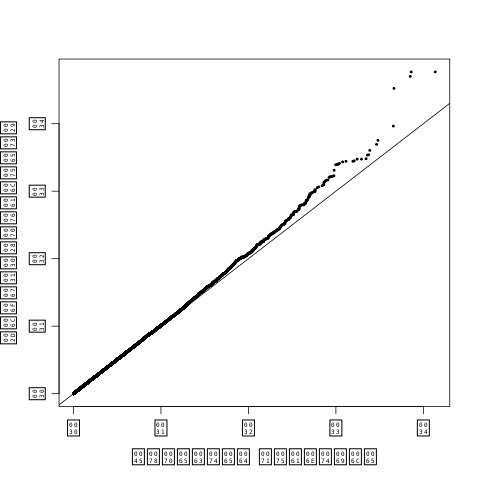

In [72]:
%%R

library("lfmm")
genotype <- example.data$genotype
phenotype <- example.data$phenotype #scaled phenotype
print (dim(genotype))
print (dim(phenotype))

#print(head(genotype, n=5))
#     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
#[1,]    0    1    1    1    1    1    1    0    1     1     1     0     1     0
#[2,]    0    1    1    1    1    1    1    0    1     1     1     1     0     0
#[3,]    0    1    0    1    1    1    1    1    1     1     1     0     1     0

#print(head(phenotype, n=5))
#            [,1]
#[1,]  0.48749391
#[2,] -0.06499919
#[3,]  0.48749391
#[4,] -0.06499919
#[5,] -0.61749228

mod.lfmm <- lfmm_ridge(Y = genotype, X = phenotype, K = 2)
pv <- lfmm_test(Y = genotype, X = phenotype, lfmm = mod.lfmm, calibrate = "gif")

pvalues <- pv$calibrated.pvalue 
qqplot(rexp(length(pvalues), rate = log(10)),
       -log10(pvalues), xlab = "Expected quantile",
       pch = 19, cex = .4)
abline(0,1)

R[write to console]: Extracting number of samples and rownames from output_file.1.fam...

R[write to console]: Extracting number of variants and colnames from output_file.1.bim...

R[write to console]: Read 610 items



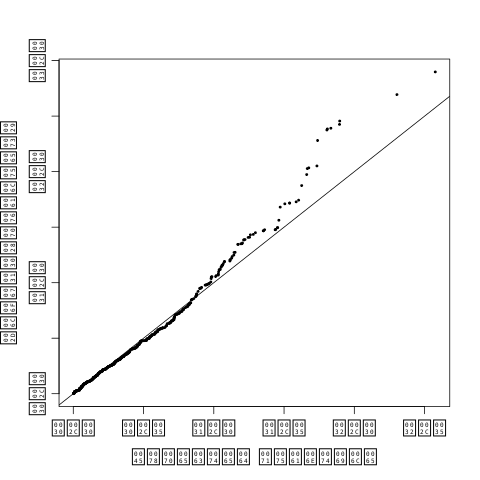

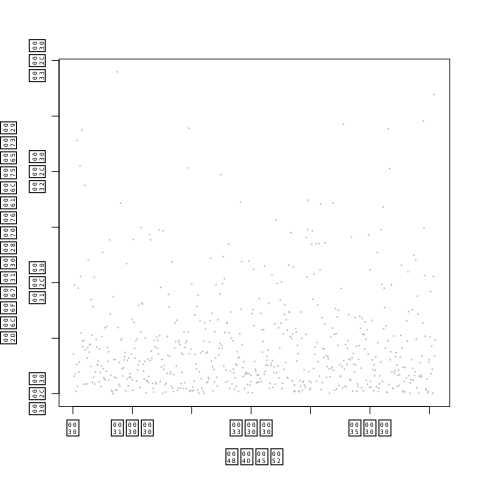

In [73]:
%%R -i df

bed <- "output_file.1.bed"
bim <- "output_file.1.bim"
fam <- "output_file.1.fam"
samples_file <- "../samples_OGOB.txt"
kmer_list <- "output_file.1/1short.txt"

# loading R packages
library("BEDMatrix")
library("pcadapt")
library("lfmm")
library("rlist")

set.seed(802)

# reading samples file from FAM file
file_to_pop = read.delim(fam, sep = ' ', header = FALSE)

# get nb of samples from samples.txt
nb_samples = length(file_to_pop[[1]])

############# phenotype ##############"
# le phenotype est la matrice zscores pour les 109 ind qui avaient des donnes clima dispo
phenotype = df

#print(phenotype[,1])

############# genotype ##############
# les genotypes correspond à la table de presence/absence des kmers
# create a BEDMatrix object the example .bed file
bed <- BEDMatrix(bed, simple_names = T)
# extraction of random kmers found in segment file
kl <- scan(kmer_list)

# reduction de la matrix bedmatrix
##genotype <- bed[which(rownames(bed) %in% rownames(phenotype)), sort(kl)]
genotype = bed[1:nb_samples, sort(kl)]
genotype_reduit = genotype[which(rownames(genotype) %in% phenotype[,1]),]

#str(genotype_reduit)
############# LFMM ##############
#The ridge_lfmm function returns an object that contains the latent variable score matrix U, 
#the latent variable loading matrix U, and B the effect sizes for all SNPs. 
#The result can be used to perform an association study:

mod.lfmm <- lfmm_ridge(Y = genotype_reduit, X = phenotype[,2], K = 2)
#mod.lfmm

pv <- lfmm_test(Y = genotype_reduit, X = phenotype[,2], lfmm = mod.lfmm, calibrate = "gif")

pvalues <- pv$calibrated.pvalue 

# Screen plot
#pdf(file="lfmm_rplot.pdf")
qqplot(rexp(length(pvalues), rate = log(10)),
       -log10(pvalues), xlab = "Expected quantile",
       pch = 19, cex = .4)
abline(0,1)

## Manhattan plot with causal loci shown
plot(-log10(pvalues), pch = 19,
     cex = .2, col = "grey", xlab = "KMER")

points(example.data$causal.set,
      -log10(pvalues)[example.data$causal.set],
       type = "h", col = "blue")
#dev.off()


In [74]:
pv = %R pv


In [75]:
pvalues = %R pvalues
pvalues
df = pd.DataFrame(pvalues, columns = ['pvalues'])
print(df.min(),df.max(),df.mean())

pvalues    0.001264
dtype: float64 pvalues    0.999307
dtype: float64 pvalues    0.49955
dtype: float64


In [76]:
# Importing the NumPy module
import numpy as np
import pandas as pd

# Calculating variance using var()
variance= np.var(pvalues)

In [77]:
df_centered = df.apply(lambda x: (x - x.mean())/x.var())
df_centered

pvalues
0   -0.710430
1    2.370562
2   -4.780717
3    1.932885
4    5.516312
..        ...
605  5.925368
606 -4.986213
607 -6.031309
608 -0.508185
609 -2.090845

[610 rows x 1 columns]

In [78]:
#display mean of each column in the DataFrame
df_centered.mean()

pvalues    6.263114e-15
dtype: float64

In [79]:
## run qqplot en python

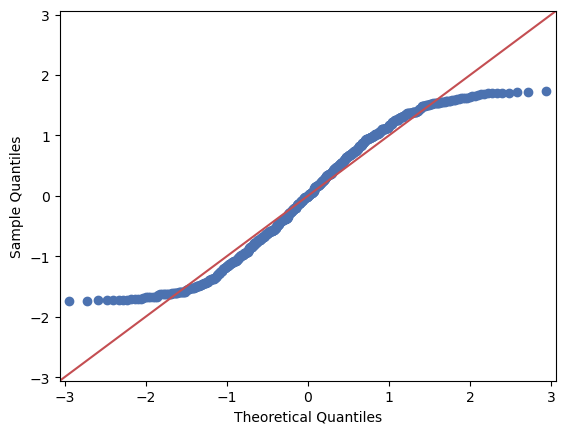

In [129]:
import numpy as np
import statsmodels.api as sm
import pylab as py

# view normalized data
display()
#sm.qqplot(-np.log10(df_centered['pvalues']), line ='45')
#sm.qqplot(df_centered['pvalues'], line ='45')
sm.qqplot(df_centered['pvalues'],fit=True,line="45")

py.show()


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
manhattanplot(df_centered['pvalues'], xticklabel_kws={"rotation": "horizontal"})